# Industry Accelerators - Sales Prediction using Weather Company Data

## Build Predictive Models

### Introduction

This notebook computes machine-learning models to predict daily product sales per location (place id) using coincident weather measurements and discount values. These models permit the identification or/and exploration of which weather variables most likely impact sales for a specific product across multiple business locations. Since product sales (target variable a.k.a. dependent variable) is a continuous-valued variable, the machine-learning models use regression algorithms to estimate predictive relationships. <br>

This notebook loads unprocessed datasets (i.e., *fauxweather1.csv* and *fauxsales1.csv*) and then uses the analysis specifications of a configuration file (i.e., *STEP 0.1*) to sequentially <br>
(a) transform the data into apt modeling input data <br>
(b) build multiple predictive models <br>
(c) save the models <br> 
(d) deploy the models for later application <br>

The datasets and configuration file are available in the **Data Assets** section. 


Before executing this notebook on IBM Cloud, you need to:<br>
1) When you import this project on an IBM Cloud environment, a project access token should be inserted at the top of this notebook as a code cell. <br>
If you do not see the cell above, Insert a project token: Click on **More -> Insert project token** in the top-right menu section and run the cell. <br>

![ws-project.mov](https://media.giphy.com/media/jSVxX2spqwWF9unYrs/giphy.gif)
2) Provide your IBM Cloud API key in the subsequent cell.<br>
3) You can then step through the notebook execution cell by cell, by selecting Shift-Enter. Or you can execute the entire notebook by selecting **Cell -> Run All** from the menu.<br>


#### Insert IBM Cloud API key

Your Cloud API key can be generated by going to the <a href="https://cloud.ibm.com/iam/apikeys" target="_blank" rel="noopener noreferrer">API Keys section of the Cloud console</a>. From that page, scroll down to the **API Keys** section, and click **Create an IBM Cloud API key**. Give your key a name and click **Create**, then copy the created key and paste it below. 

If you are running this notebook on Cloud Pak for Data on-prem, leave the `ibmcloud_api_key` field blank.

In [2]:
ibmcloud_api_key=''

Weather Data Schema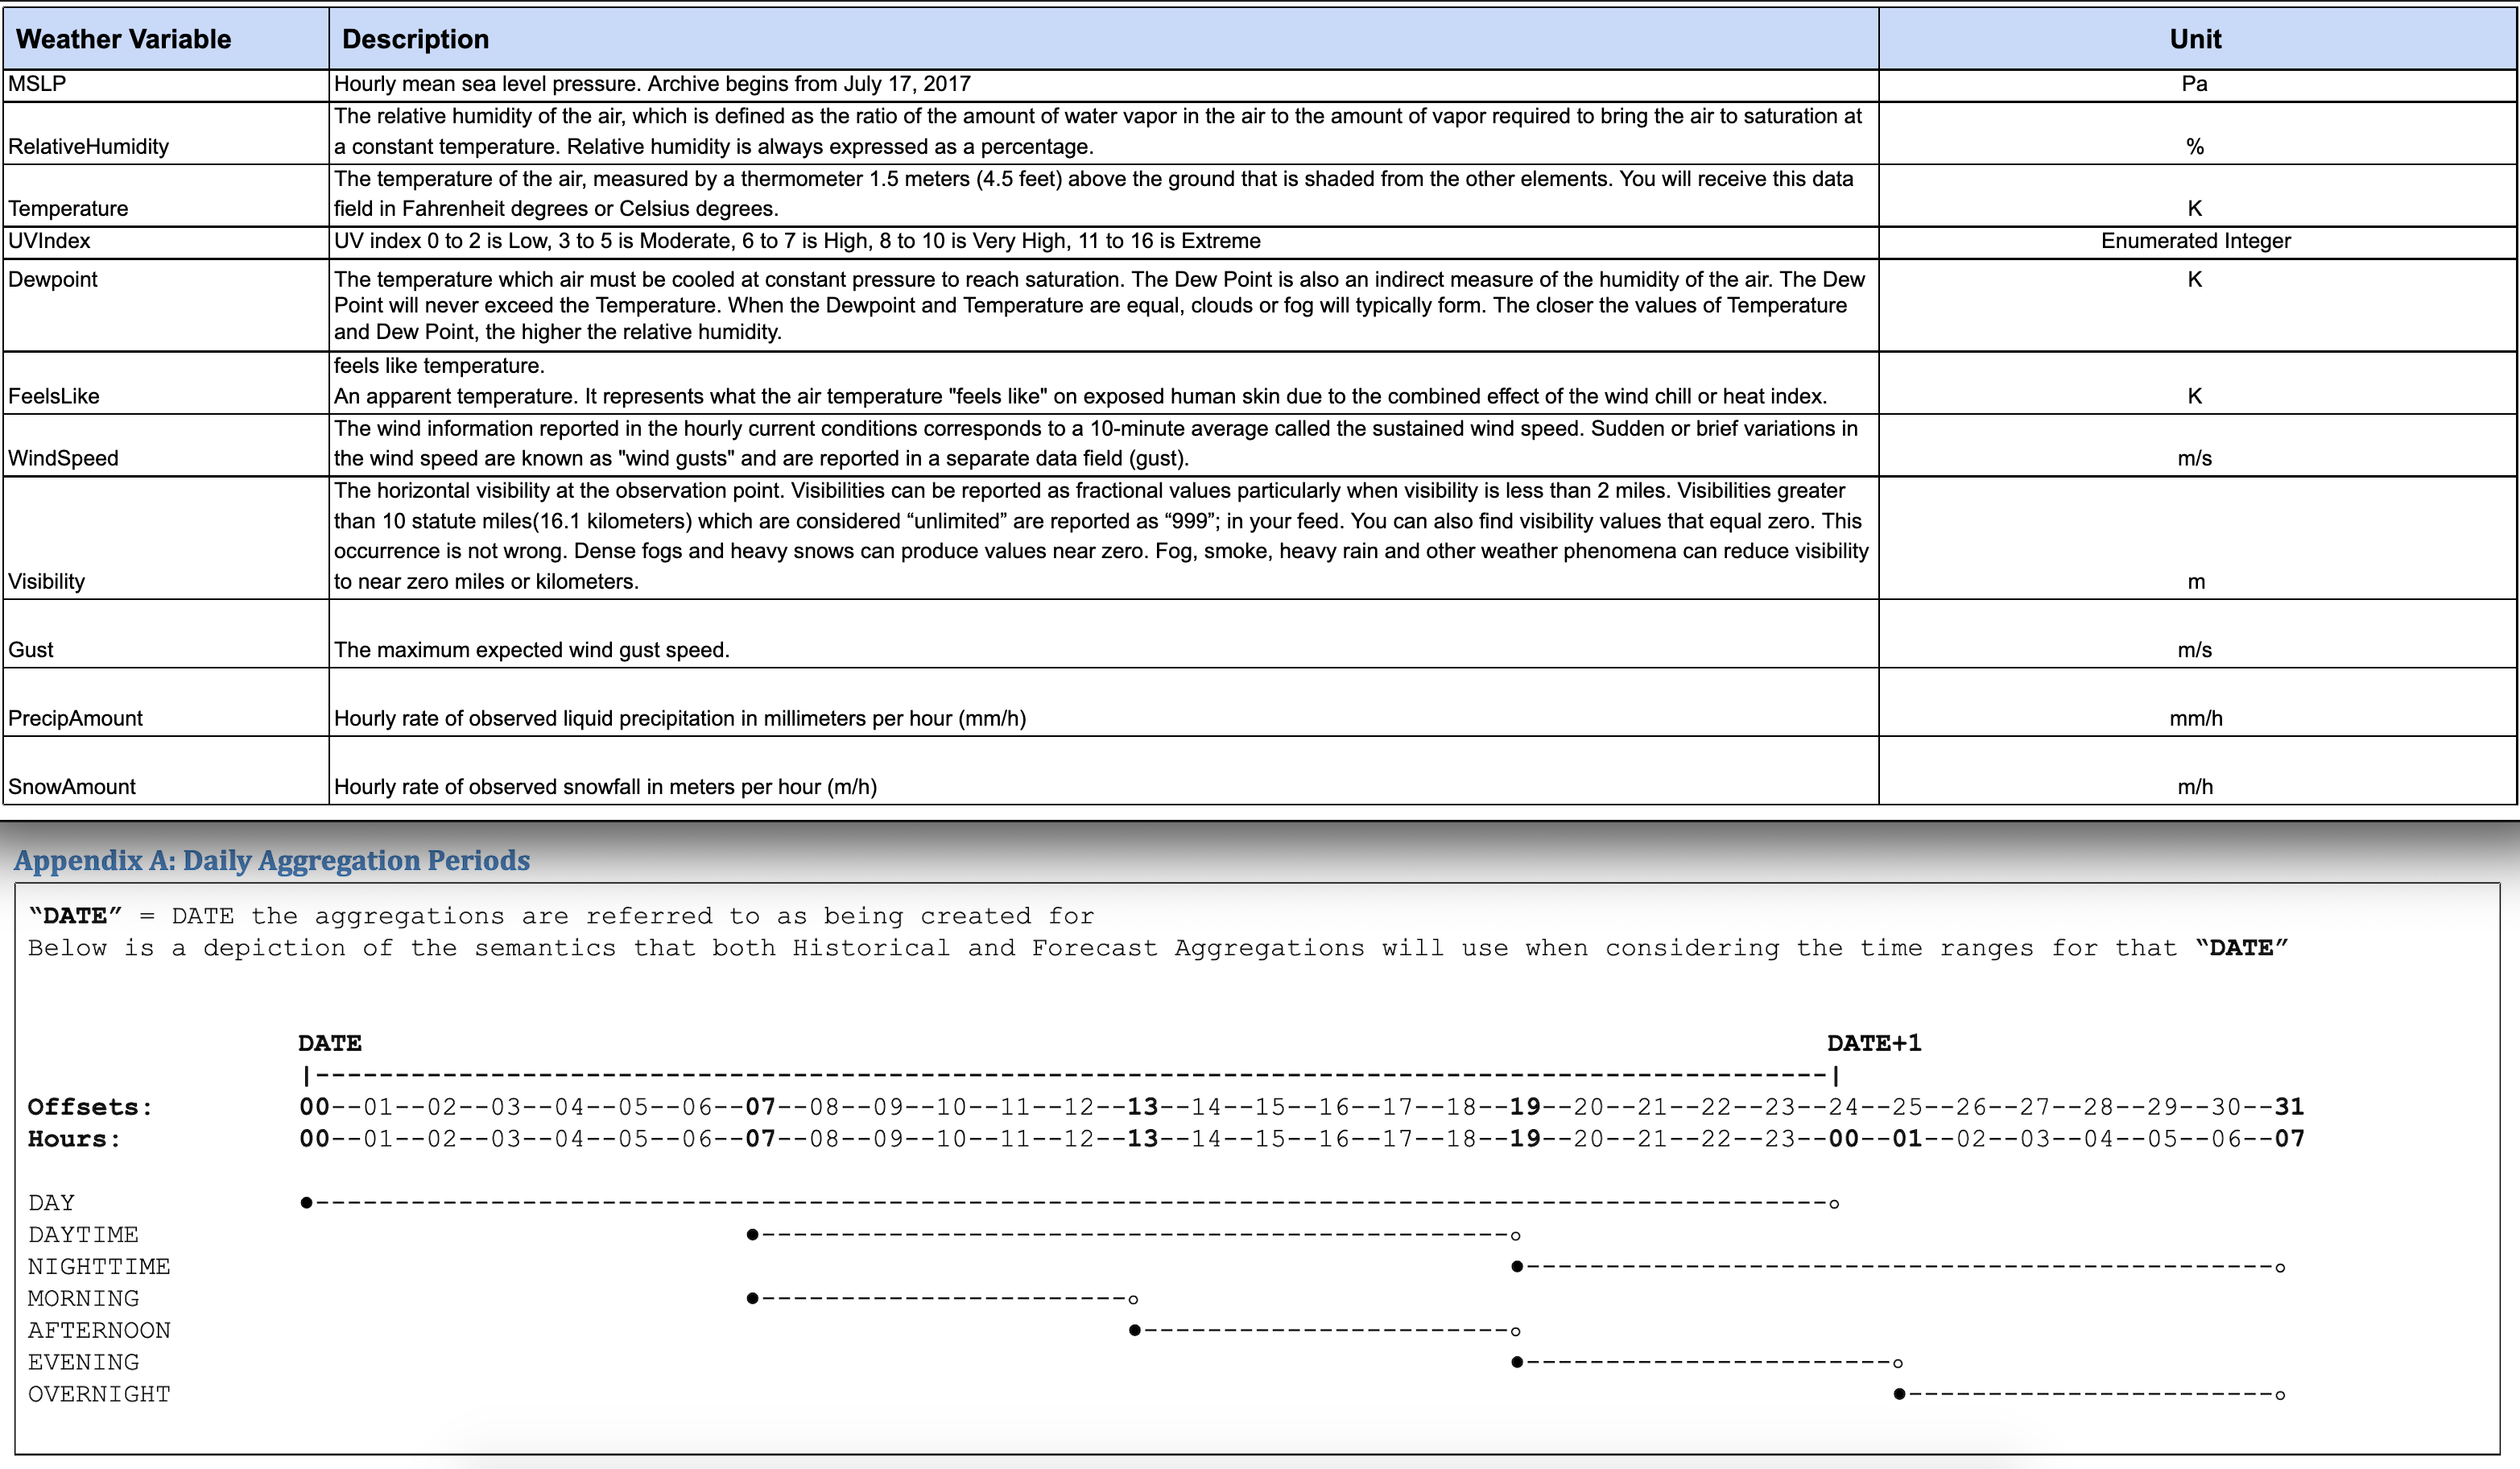

### Step 0.1: Configure the Analysis: Import Software Packages, Set Parameters and Define Custom Functions

The following cells configure the analysis (i.e., import python software packages, set predefined variables (a.k.a. "parameters", a.k.a "settings"), and define custom functions).

In [3]:
config="config.py"
f = open(config, 'w+b')
f.write(project.get_file(config).getbuffer())
f.close()

In [4]:
config2="config2.py"
f = open(config2, 'w+b')
f.write(project.get_file(config2).getbuffer())
f.close()

In [5]:

# ----------------------------------------------------------------------------------------------------------------------
# LOAD ANALYSIS CONFIGURATION
# ----------------------------------------------------------------------------------------------------------------------

# import configuration information from the config script files stored under the Data Assets section.

from config import *
import random
import string

loadfile1="fauxsales1.csv"
loadfile2="fauxweather1.csv"

# notify scientist: completed analyses
print("DONE: 'STEP 0.1: Configure Analysis' analysis")

DONE: 'STEP 0.1a: Import Software Packages' analysis
DONE: 'STEP 0.1b: Set Parameters' analysis
DONE: 'STEP 0.1c: Define Custom Functions' analysis
DONE: 'STEP 0.1: Configure Analysis' analysis


### STEP 1.1: Evaluate Data
Ideally and prospectively, this substep simply computes statistics (typically descriptive stats) including analytics-focused or/and business-focused "quality metrics" of the data variables (columns).

In [6]:

# ----------------------------------------------------------------------------------------------------------------------
#  EVALUATE DATA
# ----------------------------------------------------------------------------------------------------------------------

list_loadfile = [loadfile1, loadfile2]

#
for loadfilenow in list_loadfile:
    
    # load data
#     df = pd.read_csv(loadfilenow, dtype=dict_dtypes, parse_dates=[name_columndatetime])
    my_file = project.get_file(loadfilenow)
    #my_file.seek(0)
    df = pd.read_csv(my_file)
    
    # compute columnar quality metrics (e.g., nunique, isnan, dtype, min, max, kurtosis): merged client data
    mydfdescribe(df)


# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 1.1: Evaluate Data' analysis")


dtypes  nunique  count  percent_nan  percent_blank  percent_zero  percent_negative                min                max   kurtosis
date         int64    731      2193   0.0          0.0            0.000000      0.0               20160101           20171231          -1.982886 
dateandtime  object   731      2193   0.0          0.0            0.000000     NaN                20160101 00:00:00  20171231 00:00:00 NaN       
placeId      int64    3        2193   0.0          0.0            0.000000      0.0               78152              96468             -1.500685 
placeName    object   3        2193   0.0          0.0            0.000000     NaN                place_078152       place_096468      NaN       
postalcode   int64    3        2193   0.0          0.0            0.000000      0.0               65807              84123             -1.500685 
countrycode  object   1        2193   0.0          0.0            0.000000     NaN                us                 us                NaN       
productname  object   1        2193   0.0          0.0            0.000000     NaN                thingamajig        thingamajig       NaN       
producttype  object   1        2193   0.0          0.0            0.000000     NaN                categoryA          categoryA         NaN       
discount     float64  3        2193   0.0          0.0            0.339717      0.0               0.0                0.2               -1.517852 
closed       bool     2        2193   0.0          0.0            0.989056      0.0               False              True               86.586088
sales        float64  2031     2193   0.0          0.0            0.073871      0.0               0.0                33144.18           2.769503

dtypes  nunique  count  percent_nan  percent_blank  percent_zero  percent_negative           min           max     kurtosis
DewpointLocalAfternoonAvg          float64  1453     2193   0.0          0.0            0.0           0.011400         -1.563751e+01  7.292249e+01 -0.315214   
DewpointLocalAfternoonMax          float64  397      2193   0.0          0.0            0.0           0.006384         -1.246042e+01  7.411958e+01 -0.365741   
DewpointLocalAfternoonMin          float64  403      2193   0.0          0.0            0.0           0.002280         -1.058652e+01  8.157348e+01 -0.264868   
DewpointLocalDayAvg                float64  1993     2193   0.0          0.0            0.0           0.001368         -2.442216e+00  8.548094e+01 -0.309612   
DewpointLocalDayMax                float64  387      2193   0.0          0.0            0.0           0.004560         -1.381763e+01  7.276237e+01 -0.458122   
DewpointLocalDayMin                float64  419      2193   0.0          0.0            0.0           0.042408         -3.143862e+01  6.918138e+01 -0.122416   
DewpointLocalDaytimeAvg            float64  1772     2193   0.0          0.0            0.0           0.025536         -2.026114e+01  6.741385e+01 -0.331288   
DewpointLocalDaytimeMax            float64  386      2193   0.0          0.0            0.0           0.000912         -4.058771e+00  8.252123e+01 -0.418973   
DewpointLocalDaytimeMin            float64  416      2193   0.0          0.0            0.0           0.152759         -3.743458e+01  5.706542e+01 -0.210670   
DewpointLocalEveningAvg            float64  1469     2193   0.0          0.0            0.0           0.029184         -3.168687e+01  6.812313e+01 -0.255538   
DewpointLocalEveningMax            float64  408      2193   0.0          0.0            0.0           0.008664         -2.326266e+01  7.519734e+01 -0.292875   
DewpointLocalEveningMin            float64  416      2193   0.0          0.0            0.0           0.034200         -3.305257e+01  6.846743e+01 -0.218170   
DewpointLocalMorningAvg            float64  1455     2193   0.0          0.0            0.0           0.012312         -1.781504e+01  7.320496e+01 -0.350819   
DewpointLocalMorningMax            float64  396      2193   0.0          0.0            0.0           0.000912         -3.653143e+00  8.616686e+01 -0.409828   
DewpointLocalMorningMin            float64  410      2193   0.0          0.0            0.0           0.110807         -3.566199e+01  5.937801e+01 -0.289619   
DewpointLocalNighttimeAvg          float64  1811     2193   0.0          0.0            0.0           0.000912         -1.348704e+01  8.741795e+01 -0.269628   
DewpointLocalNighttimeMax          float64  397      2193   0.0          0.0            0.0           0.014136         -2.719290e+01  7.126710e+01 -0.297656   
DewpointLocalNighttimeMin          float64  408      2193   0.0          0.0            0.0           0.010032         -2.543273e+01  7.644727e+01 -0.222983   
DewpointLocalOvernightAvg          float64  1495     2193   0.0          0.0            0.0           0.011400         -2.643458e+01  7.556541e+01 -0.294883   
DewpointLocalOvernightMax          float64  397      2193   0.0          0.0            0.0           0.003648         -2.133171e+01  7.982829e+01 -0.313792   
DewpointLocalOvernightMin          float64  408      2193   0.0          0.0            0.0           0.042408         -3.537960e+01  6.704040e+01 -0.286934   
FeelsLikeLocalAfternoonAvg         float64  1637     2193   0.0          0.0            0.0           0.016416         -2.432087e+01  9.999912e+01 -0.653506   
FeelsLikeLocalAfternoonMax         float64  522      2193   0.0          0.0            0.0           0.010032         -2.113844e+01  1.025216e+02 -0.629623   
FeelsLikeLocalAfternoonMin         float64  537      2193   0.0          0.0            0.0           0.013224         -2.560682e+01  1.054332e+02 -0.665246   
FeelsLikeLocalDayAvg               f

DONE: 'STEP 1.1: Evaluate Data' analysis


### Select the Deployment Space and set up connection to Machine Learning Client

#### Create the Deployment Space

Before we save the model, we must create a deployment space. Watson Machine Learning provides deployment spaces where the user can save, configure and deploy their models. We can save models, functions and data assets in this space. 

If you do not have a space already created, you can use Deployment Spaces Dashboard to create one.

- Navigate to **Deployments**.
- Click **New Deployment Space**.
- Enter the deployment space name.
- Select Cloud Object Storage.
- Select Watson Machine Learning instance and press **Create**.
- Name the deployment space as `wxsignals_clientname`

The steps involved in saving and deploying the pipeline are detailed in the following cells. We will use the [ibm-watson-machine-learning](http://ibm-wml-api-pyclient.mybluemix.net) package to complete these steps.


In [7]:
# Specify a name for the space created
space_name = "{}_{}".format(name_offering, name_client)
space_name

'wxsignals_clientname'

Code in cell below imports the `ibm_watson_machine_learning` library and then creates a wml client using the credentials provided.

In [8]:
from ibm_watson_machine_learning import APIClient
import os

location = os.environ['RUNTIME_ENV_REGION'] 

if ibmcloud_api_key != '':
    wml_credentials = {
        "apikey": ibmcloud_api_key,
        "url": 'https://' + location + '.ml.cloud.ibm.com'
    }
else:
    token = os.environ['USER_ACCESS_TOKEN']

    wml_credentials = {
        "token": token,
        "instance_id" : "openshift",
        "url": os.environ['RUNTIME_ENV_APSX_URL'],
        "version": "4.0"
     }

client = APIClient(wml_credentials)

By default, if the space name already exists, the existing space will be used to store and deploy models and functions.



In [9]:
space_uid=""
for space in client.spaces.get_details()['resources']:

    if space['entity']['name'] == space_name:
        print("Deployment space with ",space_name," exists.")
        space_uid=space['metadata']['id']
        client.set.default_space(space_uid)
        print("Using the existing space.")
            
            
if space_uid=="":
    print("Deployment space",space_name, "doesn't exist, Please create a new deployment space before continuing.")
    raise Exception("Deployment space doesn't exist.")

Deployment space with  wxsignals_clientname  exists.


'SUCCESS'

Using the existing space.


### STEP 1.2: Transform Data

Since there are a lot of weather variables in the *fauxweather1.csv*, typically, this substep derives new variables from the extant ones or/and aggregates values of variables by a single variable or a combination of chosen variables thereby transforming the data

In [10]:
# ----------------------------------------------------------------------------------------------------------------------
#
# ----------------------------------------------------------------------------------------------------------------------

# NOTE: For most generality, the code likely must resume a "join all the data then aggregate it" approach rather
#     : than the current "aggregate non-weather data then join weather to it" approach that exploits a presumed
#     : "compute models per location" solution (especially since weather is a location-variant dataset).

# ----------------------------------------------------------------------------------------------------------------------
#
# ----------------------------------------------------------------------------------------------------------------------

# load data: client data
myfile = project.get_file(loadfile1)
#myfile.seek(0)
df1 = pd.read_csv(myfile, dtype=dict_columnsdtypes_client, parse_dates=[name_columndatetime]).\
    rename(columns=dict_columnsrename_client, inplace=False)

# compute independent variables: time-based variables
# todo: brainstorm more derived (extracted) variables
df1 = derivevariables_time(df1, name_columndatetime)

# compute aggregated variables: independent variables and dependent variables
df1 = df1.groupby(list_columnsgroupby, as_index=False).agg(dict_columnsagg_agg).\
    astype(dict_columnsdtypes_agg).\
    rename(columns=dict_columnsrename_agg).\
    reset_index(inplace=False, drop=True) # TODO: combine this with previous line

# ----------------------------------------------------------------------------------------------------------------------
#
# ----------------------------------------------------------------------------------------------------------------------

# load data: weather data
# TODO: update the hardcoded aspects here after above update of config variables
myfile = project.get_file(loadfile2)
#myfile.seek(0)
df2 = pd.read_csv(myfile, dtype=dict_columnsdtypes_weather, parse_dates=["date"]).\
    rename(columns=dict_columnsrename_weather, inplace=False).\
    loc[:, ["dateW", "postalcodeW"] + list_colpick_weather]

df2["dateW"] = pd.to_datetime(df2["dateW"], format="%Y%m%d").dt.date.astype("str")

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# compute data: merge client data, weather data, and postalcode data
# TODO: drop redundant columns via the data joins
df = df1.merge(df2, left_on=["date", "postalcode"], right_on=["dateW", "postalcodeW"], how=valu_howjoin)

# display data
df.head(n=valu_numrowshead)

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 1.2: Transform Data' analysis")


date placeId producttype     placeName postalcode  minute  hour  weekday  day  month  quarter  year  discount     sales       dateW postalcodeW  DewpointLocalMorningAvg  FeelsLikeLocalDaytimeMin  FeelsLikeLocalDaytimeMax  FeelsLikeLocalDaytimeAvg  GustLocalDayMax  GustLocalDaytimeAvg  GustLocalMorningAvg  PrecipAmountLocalDayMax  PrecipAmountLocalDayMin  PrecipAmountLocalDayAvg  PrecipAmountLocalDaytimeAvg  PrecipAmountLocalEveningAvg  RelativeHumidityLocalDaytimeMin  RelativeHumidityLocalDaytimeMax  RelativeHumidityLocalDaytimeAvg  SnowAmountLocalDayMax  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeMin  TemperatureLocalDaytimeAvg  UVIndexLocalDaytimeAvg  VisibilityLocalDaytimeAvg  WindSpeedLocalDaytimeAvg
0  2016-01-01  078152  categoryA   place_078152  65807      0       0     6        1    1      1        2016  0.1       0.00      2016-01-01  65807       19.294962                13.980513                 29.574154                 33.848282                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     35.408451                        90.968269                        58.350410                        0.010339               25.651545                   28.390444                   32.289480                   1.239738                8.665123                   8.255852                
1  2016-01-01  094352  categoryA   place_094352  82007      0       0     6        1    1      1        2016  0.1       0.00      2016-01-01  82007      -2.485020                -6.179487                  15.714154                 18.218306                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     24.008451                        48.268269                        38.833743                        0.010339               14.851545                   15.610444                   20.739474                   1.156404                8.665123                   10.306436               
2  2016-01-01  096468  categoryA   place_096468  84123      0       0     6        1    1      1        2016  0.1       0.00      2016-01-01  84123      -1.825032                -5.459487                  21.294154                 21.368306                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     33.308451                        74.368269                        51.325412                        0.010339               10.891545                   10.030444                   15.249474                   1.156404                9.503822                   1.768552                
3  2016-01-02  078152  categoryA   place_078152  65807      0       0     7        2    1      1        2016  0.1       26100.46  2016-01-02  65807       20.764968                17.220513                 40.014154                 42.203270                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     24.108451                        80.668269                        48.700412                        0.010339               34.651545                   31.270444                   39.114468                   1.323071                8.581911                   8.628686                
4  2016-01-02  094352  categoryA   place_094352  82007      0       0     7        2    1      1        2016  0.2       16744.62  2016-01-02  82007       2.314968                 2.640513                  27.954154                 26.948270                 1.454665         0.902338             0.59834              0.003129                 0.000235     

DONE: 'STEP 1.2: Transform Data' analysis


### STEP 1.3: Explore Data
Typically, this substep involves basic inital tabulations, histograms, correlations, time-series plots, etc.

In [11]:
# compute number of dependent variables
num_dvariables = len(list_variablesdependent)

#
list_columnsall = df.columns.to_list()
list_columnsnumerical = sorted(df.select_dtypes(include=['float64', 'int64']).columns.to_list())
list_columnscategorical = sorted(list(set(list_columnsall) - set(list_columnsnumerical)))
valu_numrows = df.shape[0]

In [12]:
#histogram function

def histograms_plot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(30,30))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=int(math.sqrt(valu_numrows)),ax=ax,facecolor='green')
        ax.set_title(feature+" Distribution",color='red')

    fig.tight_layout()  
    plt.show()


#### STEP 1.3.1: Exploring Numerical Data

The following plots show the frequency distribution of every single weather measure.

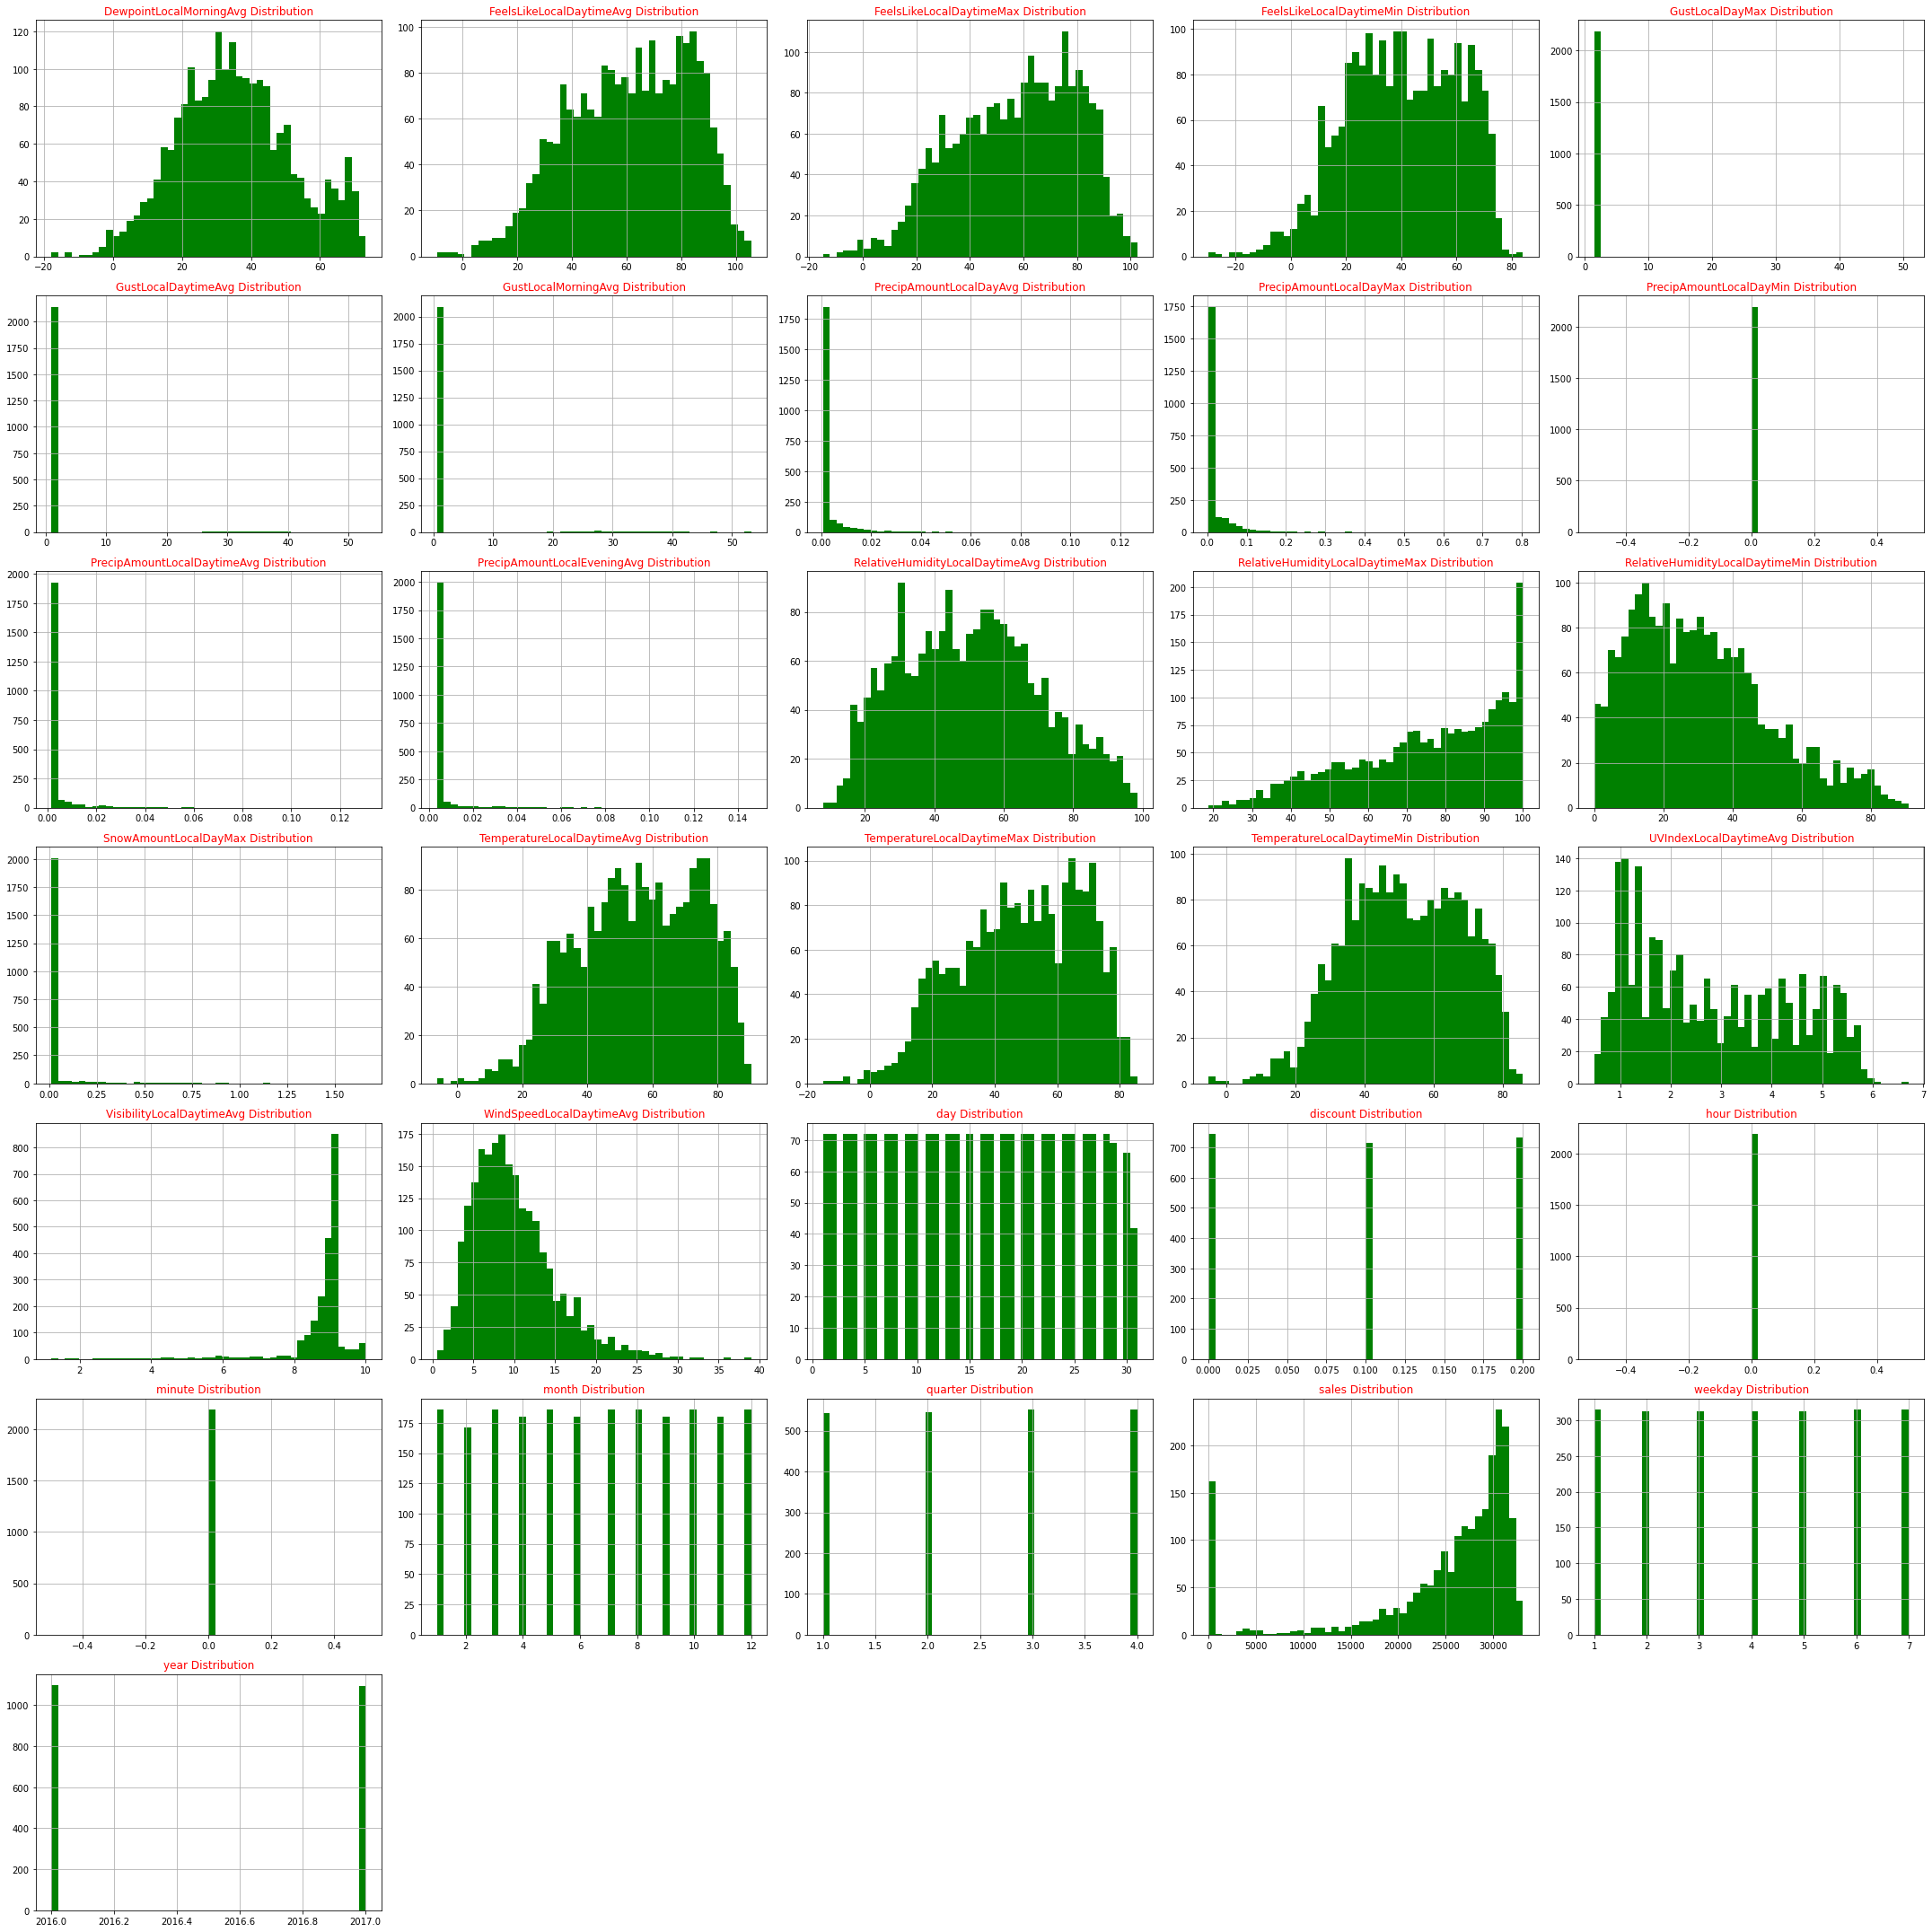

In [13]:
histograms_plot(df,list_columnsnumerical,7,5)

#### STEP 1.3.2 Exploring Categorical Data

Similar frequency distribution of categorical variables. 

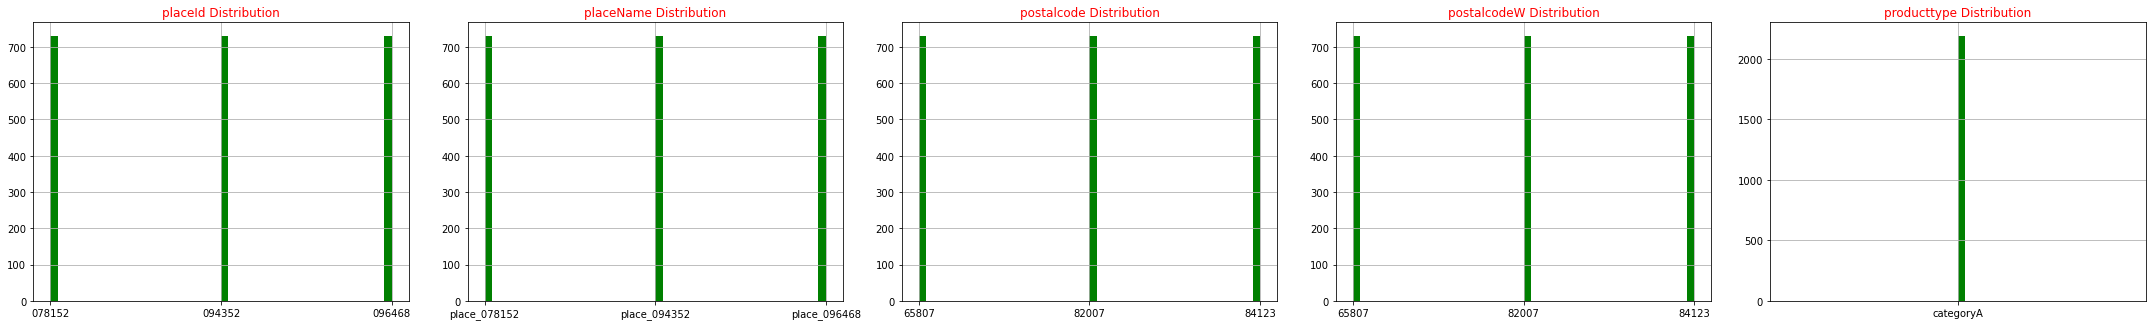

In [14]:
temp_categorical=list_columnscategorical
if 'date' in temp_categorical == True or 'dateW' in temp_categorical:
    temp_categorical.remove('date')
    temp_categorical.remove('dateW')
#removing these as these insights are not giving us any analytical insight 

histograms_plot(df,temp_categorical,7,5)

#### STEP 1.3.3 Exploring the relationship between weather variables and sales

In [15]:
#data frame to populate weather and sales data
scatter_df = df[list_colpick_weather + list_columnsother+list_variablesdependent]
scatter_df.head()

DewpointLocalMorningAvg  FeelsLikeLocalDaytimeMin  FeelsLikeLocalDaytimeMax  FeelsLikeLocalDaytimeAvg  GustLocalDayMax  GustLocalDaytimeAvg  GustLocalMorningAvg  PrecipAmountLocalDayMax  PrecipAmountLocalDayMin  PrecipAmountLocalDayAvg  PrecipAmountLocalDaytimeAvg  PrecipAmountLocalEveningAvg  RelativeHumidityLocalDaytimeMin  RelativeHumidityLocalDaytimeMax  RelativeHumidityLocalDaytimeAvg  SnowAmountLocalDayMax  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeMin  TemperatureLocalDaytimeAvg  UVIndexLocalDaytimeAvg  VisibilityLocalDaytimeAvg  WindSpeedLocalDaytimeAvg  minute  weekday  month  day  quarter  year  hour     sales
0  19.294962                13.980513                 29.574154                 33.848282                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     35.408451                        90.968269                        58.350410                        0.010339               25.651545                   28.390444                   32.289480                   1.239738                8.665123                   8.255852                  0       6        1      1    1        2016  0     0.00    
1 -2.485020                -6.179487                  15.714154                 18.218306                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     24.008451                        48.268269                        38.833743                        0.010339               14.851545                   15.610444                   20.739474                   1.156404                8.665123                   10.306436                 0       6        1      1    1        2016  0     0.00    
2 -1.825032                -5.459487                  21.294154                 21.368306                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     33.308451                        74.368269                        51.325412                        0.010339               10.891545                   10.030444                   15.249474                   1.156404                9.503822                   1.768552                  0       6        1      1    1        2016  0     0.00    
3  20.764968                17.220513                 40.014154                 42.203270                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     24.108451                        80.668269                        48.700412                        0.010339               34.651545                   31.270444                   39.114468                   1.323071                8.581911                   8.628686                  0       7        1      2    1        2016  0     26100.46
4  2.314968                 2.640513                  27.954154                 26.948270                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     21.408451                        64.668269                        39.817077                        0.010339               22.951545                   22.990444                   26.799444                   1.156404                8.500149                   8.088077                  0       7        1      2    1        2016  0     16744.62

The following plots show sales trends compared to the weather measure type.

SALES TRENDS RELATED TO WEATHER MEASURES


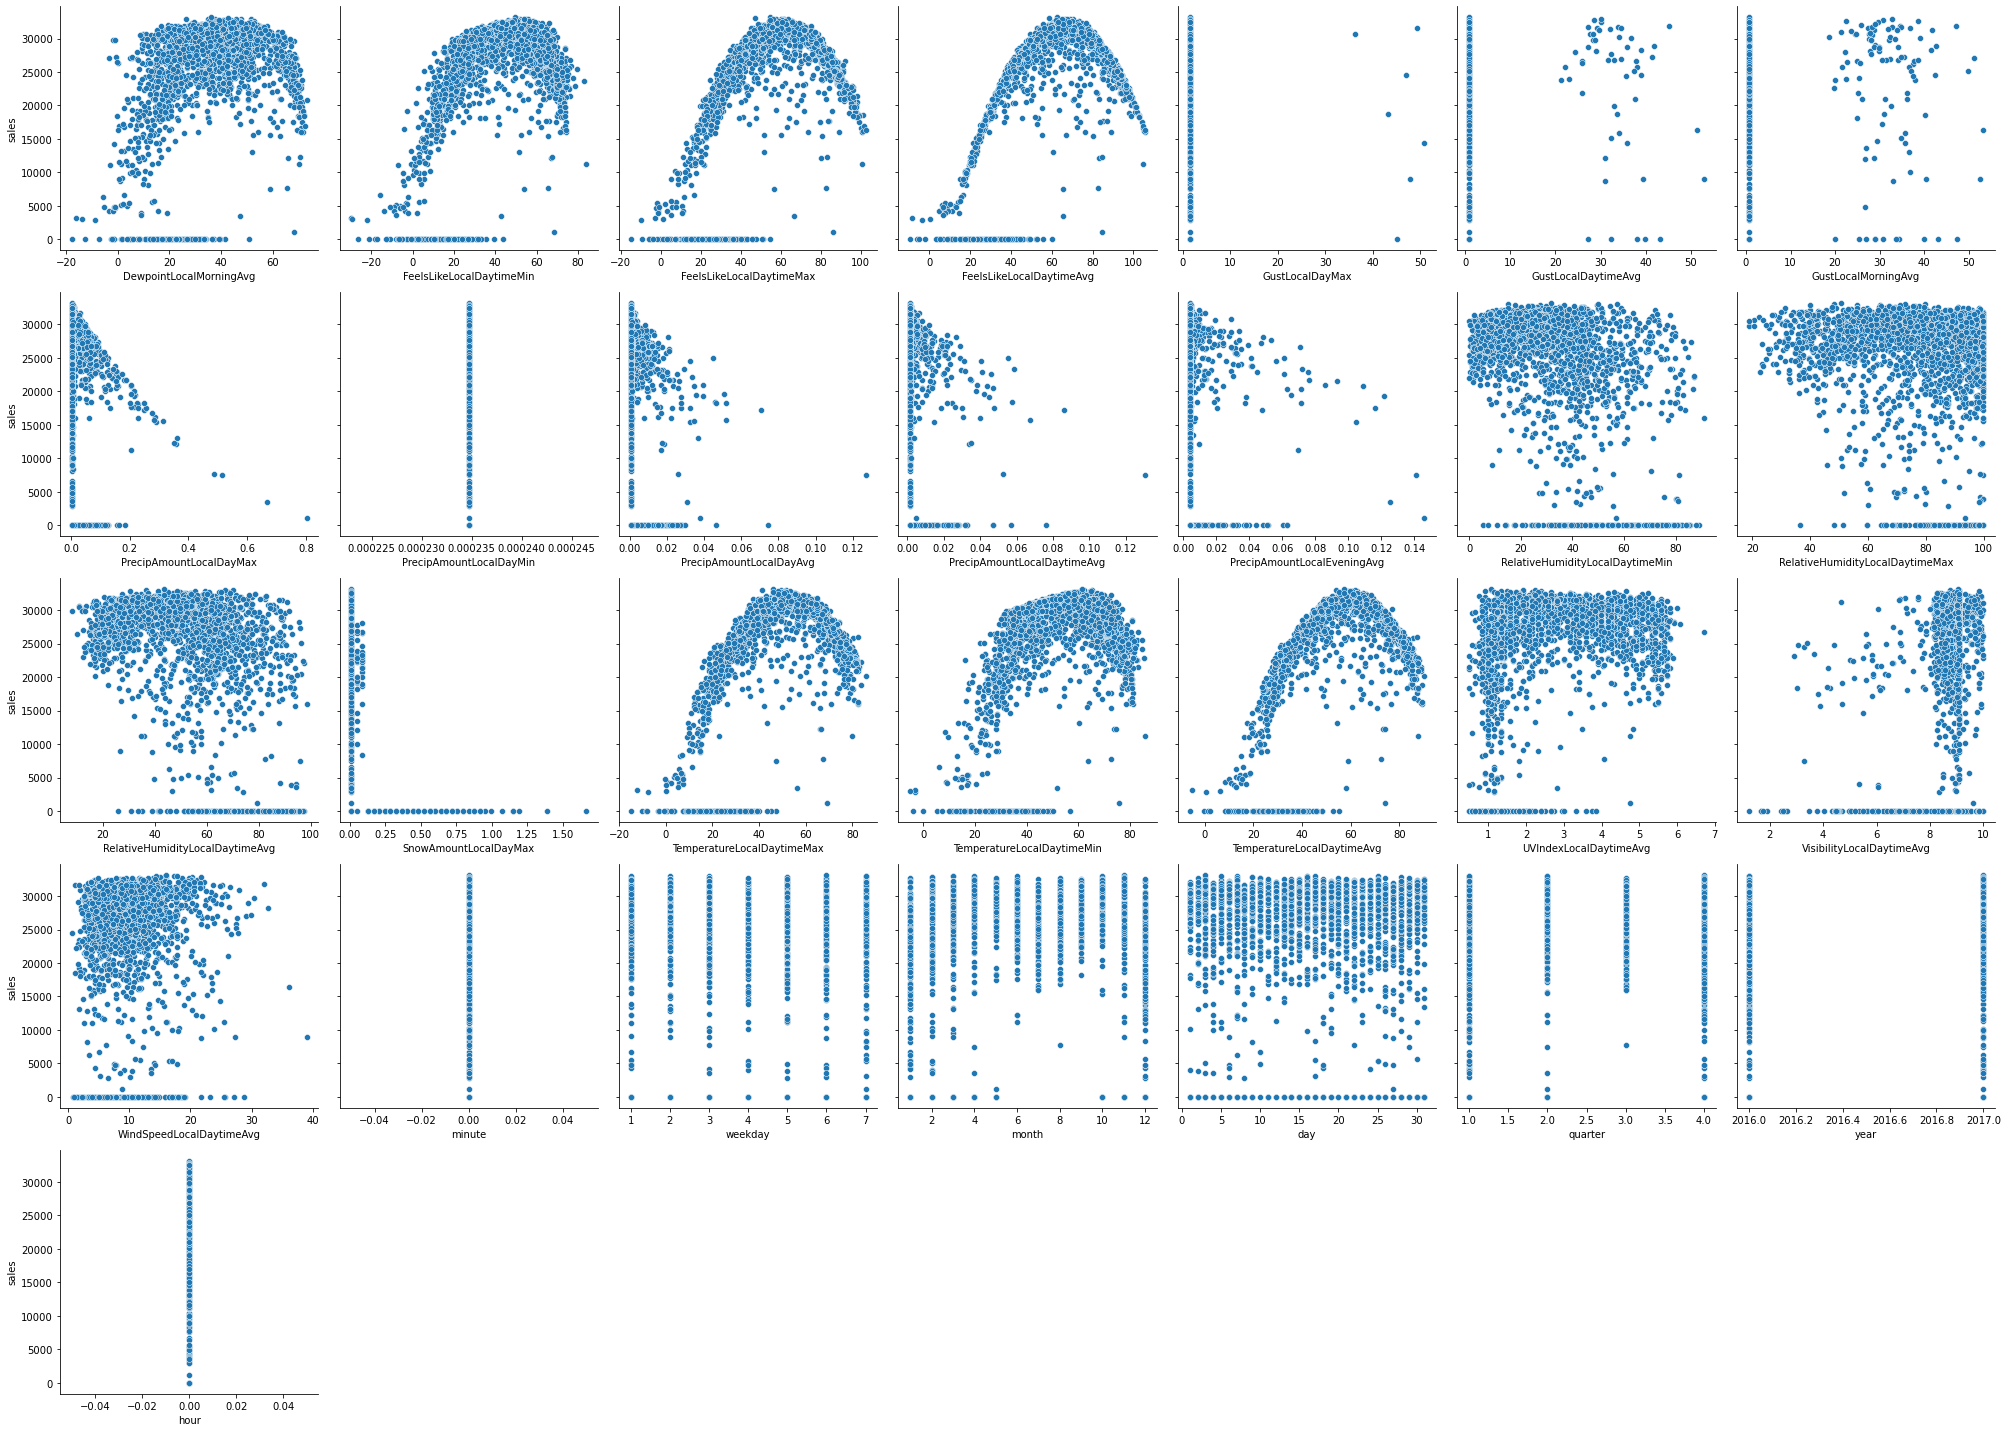

In [16]:
# plotting sales against weather and also temporal variables
print("SALES TRENDS RELATED TO WEATHER MEASURES")
x_column_names=list_colpick_weather + list_columnsother
g = sns.FacetGrid(pd.DataFrame(x_column_names), col=0, col_wrap=7, sharex=False, height = 4)
for ax, xvar in zip(g.axes, x_column_names):
    sns.set_style("darkgrid")
    sns.scatterplot(data=scatter_df, x=xvar, y="sales", ax=ax)
g.tight_layout();

In [17]:
# ----------------------------------------------------------------------------------------------------------------------
# Exploratory analysis
# ----------------------------------------------------------------------------------------------------------------------


dict_columnsagg_part2 = {}
for ii in list_variablesdependent:
    dict_columnsagg_part2.update({ii: "mean"})

print(dict_columnsagg_part2)

#
dict_columnsagg_part3 = {}
for ii in list_colpick_weather:
    dict_columnsagg_part3.update({ii: "mean"})

print(dict_columnsagg_part3)


#
for rr in range(len(list_columnscomboby), 0, -1):

    list_combos = list(itertools.combinations(list_columnscomboby, rr))
    
    for combo_now in list_combos:
        
        #
        list_columnscomboby_now = list(combo_now)
        list_columnstolambda = list(set(list_columnscomboby) - set(list_columnscomboby_now))
        
        #
        dict_columnsagg_part1 = {"date": "count"}
        for ii in list_columnstolambda:
            dict_columnsagg_part1.update({ii: lambda x: list(set(x))})

        print(dict_columnsagg_part1)

        #
        dict_columnsagg_full = {}
        dict_columnsagg_full.update(dict_columnsagg_part1)
        dict_columnsagg_full.update(dict_columnsagg_part2)
        dict_columnsagg_full.update(dict_columnsagg_part3)

        #
        dfA = df.groupby(list_columnscomboby_now, as_index=False).agg(dict_columnsagg_full).\
            reset_index(inplace=False, drop=True).\
            rename(columns={"date": "samplesize"})

        #
        temp = df.loc[:, list_columnscomboby_now].nunique().tolist()
        print("combo columns: " + str(list_columnscomboby_now))
        print(dfA.shape, temp, np.prod(temp))
#         mydfdescribe(dfA)
        display(dfA.sort_values(by=list_columnscomboby_now, ascending=[True]*len(list_columnscomboby_now)))

# notify scientist: completed analyses
print("DONE: 'STEP 1.3: Explore Data' analysis")

{'sales': 'mean'}
{'DewpointLocalMorningAvg': 'mean', 'FeelsLikeLocalDaytimeMin': 'mean', 'FeelsLikeLocalDaytimeMax': 'mean', 'FeelsLikeLocalDaytimeAvg': 'mean', 'GustLocalDayMax': 'mean', 'GustLocalDaytimeAvg': 'mean', 'GustLocalMorningAvg': 'mean', 'PrecipAmountLocalDayMax': 'mean', 'PrecipAmountLocalDayMin': 'mean', 'PrecipAmountLocalDayAvg': 'mean', 'PrecipAmountLocalDaytimeAvg': 'mean', 'PrecipAmountLocalEveningAvg': 'mean', 'RelativeHumidityLocalDaytimeMin': 'mean', 'RelativeHumidityLocalDaytimeMax': 'mean', 'RelativeHumidityLocalDaytimeAvg': 'mean', 'SnowAmountLocalDayMax': 'mean', 'TemperatureLocalDaytimeMax': 'mean', 'TemperatureLocalDaytimeMin': 'mean', 'TemperatureLocalDaytimeAvg': 'mean', 'UVIndexLocalDaytimeAvg': 'mean', 'VisibilityLocalDaytimeAvg': 'mean', 'WindSpeedLocalDaytimeAvg': 'mean'}
{'date': 'count'}
combo columns: ['producttype', 'placeId']
(3, 26) [1, 3] 3


producttype placeId  samplesize         sales  DewpointLocalMorningAvg  FeelsLikeLocalDaytimeMin  FeelsLikeLocalDaytimeMax  FeelsLikeLocalDaytimeAvg  GustLocalDayMax  GustLocalDaytimeAvg  GustLocalMorningAvg  PrecipAmountLocalDayMax  PrecipAmountLocalDayMin  PrecipAmountLocalDayAvg  PrecipAmountLocalDaytimeAvg  PrecipAmountLocalEveningAvg  RelativeHumidityLocalDaytimeMin  RelativeHumidityLocalDaytimeMax  RelativeHumidityLocalDaytimeAvg  SnowAmountLocalDayMax  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeMin  TemperatureLocalDaytimeAvg  UVIndexLocalDaytimeAvg  VisibilityLocalDaytimeAvg  WindSpeedLocalDaytimeAvg
0  categoryA   078152  731         26060.644268  46.233637                46.479008                 63.629366                 67.537792                 1.502404         1.313878             1.296265             0.026891                 0.000235                 0.003283                 0.003813                     0.006354                     40.011734                        87.280841                        61.131025                        0.016479               53.138604                   56.630991                   60.303097                   2.937084                8.803182                   9.593702                
1  categoryA   094352  731         23984.502531  26.912347                32.851949                 50.107205                 54.240844                 1.830457         2.606236             3.739698             0.014013                 0.000235                 0.002103                 0.003012                     0.005437                     24.901883                        68.679118                        44.033363                        0.059673               43.101203                   45.885656                   50.298887                   2.793982                8.692582                   12.457979               
2  categoryA   096468  731         24642.982558  33.256174                41.800239                 57.890789                 62.236863                 1.454665         1.181589             1.232021             0.016372                 0.000235                 0.002672                 0.003671                     0.005956                     27.902886                        68.849772                        46.776147                        0.041038               48.744733                   51.858159                   55.819857                   2.705181                8.716538                   7.677944

{'date': 'count', 'placeId': <function <lambda> at 0x7fef0146ff70>}
combo columns: ['producttype']
(1, 26) [1] 1


producttype  samplesize                   placeId         sales  DewpointLocalMorningAvg  FeelsLikeLocalDaytimeMin  FeelsLikeLocalDaytimeMax  FeelsLikeLocalDaytimeAvg  GustLocalDayMax  GustLocalDaytimeAvg  GustLocalMorningAvg  PrecipAmountLocalDayMax  PrecipAmountLocalDayMin  PrecipAmountLocalDayAvg  PrecipAmountLocalDaytimeAvg  PrecipAmountLocalEveningAvg  RelativeHumidityLocalDaytimeMin  RelativeHumidityLocalDaytimeMax  RelativeHumidityLocalDaytimeAvg  SnowAmountLocalDayMax  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeMin  TemperatureLocalDaytimeAvg  UVIndexLocalDaytimeAvg  VisibilityLocalDaytimeAvg  WindSpeedLocalDaytimeAvg
0  categoryA   2193        [094352, 096468, 078152]  24896.043119  35.467386                40.377065                 57.20912                  61.3385                   1.595842         1.700568             2.089328             0.019092                 0.000235                 0.002686                 0.003499                     0.005916                     30.938834                        74.936577                        50.646845                        0.039064               48.32818                    51.458269                   55.473947                   2.812082                8.737434                   9.909875

{'date': 'count', 'producttype': <function <lambda> at 0x7fef1058b310>}
combo columns: ['placeId']
(3, 26) [3] 3


placeId  samplesize  producttype         sales  DewpointLocalMorningAvg  FeelsLikeLocalDaytimeMin  FeelsLikeLocalDaytimeMax  FeelsLikeLocalDaytimeAvg  GustLocalDayMax  GustLocalDaytimeAvg  GustLocalMorningAvg  PrecipAmountLocalDayMax  PrecipAmountLocalDayMin  PrecipAmountLocalDayAvg  PrecipAmountLocalDaytimeAvg  PrecipAmountLocalEveningAvg  RelativeHumidityLocalDaytimeMin  RelativeHumidityLocalDaytimeMax  RelativeHumidityLocalDaytimeAvg  SnowAmountLocalDayMax  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeMin  TemperatureLocalDaytimeAvg  UVIndexLocalDaytimeAvg  VisibilityLocalDaytimeAvg  WindSpeedLocalDaytimeAvg
0  078152  731         [categoryA]  26060.644268  46.233637                46.479008                 63.629366                 67.537792                 1.502404         1.313878             1.296265             0.026891                 0.000235                 0.003283                 0.003813                     0.006354                     40.011734                        87.280841                        61.131025                        0.016479               53.138604                   56.630991                   60.303097                   2.937084                8.803182                   9.593702                
1  094352  731         [categoryA]  23984.502531  26.912347                32.851949                 50.107205                 54.240844                 1.830457         2.606236             3.739698             0.014013                 0.000235                 0.002103                 0.003012                     0.005437                     24.901883                        68.679118                        44.033363                        0.059673               43.101203                   45.885656                   50.298887                   2.793982                8.692582                   12.457979               
2  096468  731         [categoryA]  24642.982558  33.256174                41.800239                 57.890789                 62.236863                 1.454665         1.181589             1.232021             0.016372                 0.000235                 0.002672                 0.003671                     0.005956                     27.902886                        68.849772                        46.776147                        0.041038               48.744733                   51.858159                   55.819857                   2.705181                8.716538                   7.677944

DONE: 'STEP 1.3: Explore Data' analysis


### STEP 2.1: Build Predictive Models

This step builds machine-learning-based predictive models using the specified algorithms in the *list_mla* configuration and the data computed by the *makedatastrata* function as inputs to the *makemodels* function. The *makedatastrata* function divides the entire original data according to all combinations of the unique values from the variables in the *list_columnsstratby* configuration, thereby computing a list of datasets with each list item is a data strata corresponding to a combination. Changing the *list_mla* configuration parameter facilitates trying different model types. But presently this example builds models using each of the following two algorithms with basic arbitrary parameters (rather than optimized parameters, for instance via a grid search algorithm) for model estimation (a.k.a. tuning a.k.a. data fitting).

 1. Linear Support Vector Machine Regressor
 2. Random Forests Regressor

The *makemodels* code splits each stratified dataset into a model training dataset (i.e., ~75% of the sample data) and a model testing dataset (i.e., ~25% of the sample data) to estimate a model with the training data and then evaluate the estimated model with the testing data. The evaluation analysis encompasses the n-fold crossvalidation technique to tune each model whereby the *num_cvrepeats* configuration specifies the n (number of folds) of the n-fold process. The function also finds the best-performing crossvalidated model per machine-learning algorithm via a score (a.k.a. objective function) specified by the *valu_metricpickbestmodel* configuration. The code also displays some model estimation results during computation. Lastly, the *makemodels* function builds each model and returns the process results as a dictionary (*dict_results* in the above function) with the following various content. Each dictionary is an element in a list of all results, spanning the combinations of stratified dataset and the machine-learning algorithm.

    dict_results["name_data"] is a string identifying the stratified dataset as model input data
    dict_results["variables_independent"] is a list of independent variables in the model input data
    dict_results["variable_dependent"] = is a string naming the dependent variable for model prediction 
    dict_results["datascaler"] = is an object that scales each independent variable of model input data
    dict_results["name_mla"] = is a string naming the machine-learning algorithm that made the model
    dict_results["cvresults_models"] = is a list of crossvalidation results each item a dictionary of model info
    dict_results["cvresults_modelbest"] = is a dictionary of the best crossvalidation result model
    dict_results["cvresults_modelbestscore"] = is a float of the best crossvalidation result model score
    dict_results["cvresults_modelbestindex"] = is a float of the best crossvalidation result model score index*

This step builds only six models in total (i.e., the first three strata per the two machine-learing algorithms), for demonstrative purposes. The functions below have been defined in the **config.py** script which can be found in the **Data Assets** section.

In [18]:
# ----------------------------------------------------------------------------------------------------------------------
# COMPUTE STRATIFIED DATASETS
# ----------------------------------------------------------------------------------------------------------------------

#
ttic = time.time()
datastrata = makedatastrata(df, "demo", list_keepyears_build)
ttoc = time.time()
print("elapsed time of makedatastrata:", ttoc - ttic)

# ----------------------------------------------------------------------------------------------------------------------
# COMPUTE MODELS
# ----------------------------------------------------------------------------------------------------------------------

# compute models
ttic = time.time()
results_modelsbuild = makemodels(datastrata[0:3], list_mla)
ttoc = time.time()
print("elapsed time of makemodels:", ttoc - ttic)


dataset size (dfM): (2193, 34)


DewpointLocalMorningAvg  FeelsLikeLocalDaytimeMin  FeelsLikeLocalDaytimeMax  FeelsLikeLocalDaytimeAvg  GustLocalDayMax  GustLocalDaytimeAvg  GustLocalMorningAvg  PrecipAmountLocalDayMax  PrecipAmountLocalDayMin  PrecipAmountLocalDayAvg  PrecipAmountLocalDaytimeAvg  PrecipAmountLocalEveningAvg  RelativeHumidityLocalDaytimeMin  RelativeHumidityLocalDaytimeMax  RelativeHumidityLocalDaytimeAvg  SnowAmountLocalDayMax  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeMin  TemperatureLocalDaytimeAvg  UVIndexLocalDaytimeAvg  VisibilityLocalDaytimeAvg  WindSpeedLocalDaytimeAvg     sales placeId  minute  hour  weekday  day  month  quarter  year        date      group  columns_ohe
0     19.294962                13.980513                 29.574154                 33.848282                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     35.408451                        90.968269                        58.350410                        0.010339               25.651545                   28.390444                   32.289480                   1.239738                8.665123                   8.255852                  0.00      078152  0       0     6        1    1      1        2016  2016-01-01  (078152,) NaN         
1    -2.485020                -6.179487                  15.714154                 18.218306                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     24.008451                        48.268269                        38.833743                        0.010339               14.851545                   15.610444                   20.739474                   1.156404                8.665123                   10.306436                 0.00      094352  0       0     6        1    1      1        2016  2016-01-01  (094352,) NaN         
2    -1.825032                -5.459487                  21.294154                 21.368306                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     33.308451                        74.368269                        51.325412                        0.010339               10.891545                   10.030444                   15.249474                   1.156404                9.503822                   1.768552                  0.00      096468  0       0     6        1    1      1        2016  2016-01-01  (096468,) NaN         
3     20.764968                17.220513                 40.014154                 42.203270                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     24.108451                        80.668269                        48.700412                        0.010339               34.651545                   31.270444                   39.114468                   1.323071                8.581911                   8.628686                  26100.46  078152  0       0     7        2    1      1        2016  2016-01-02  (078152,) NaN         
4     2.314968                 2.640513                  27.954154                 26.948270                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     21.408451                        64.668269                        39.817077                        0.010339               22.951545                   22.990444                   26.799444                   1.156404                8.500149                   8.088077     

dependent variable (aka criterion variable): SALES
dependent variable has existence in the data: True
dataset: clientname_demo_('078152',); sample size: 731
dataset: clientname_demo_('094352',); sample size: 731
dataset: clientname_demo_('096468',); sample size: 731
elapsed time of makedatastrata: 0.09697461128234863
sample size of group clientname_demo_('078152',): 731

dependent variable (aka criterion variable): SALES
any nan: False ;  all finite: True
any nan: False ;  all finite: True
mla: SVR

{'fit_time': array([0.01767111, 0.02902246, 0.01725602, 0.01417208, 0.03620434]), 'score_time': array([0.00146484, 0.0013907 , 0.00119567, 0.00157285, 0.00129318]), 'estimator': (SVR(C=100, gamma='auto', kernel='linear'), SVR(C=100, gamma='auto', kernel='linear'), SVR(C=100, gamma='auto', kernel='linear'), SVR(C=100, gamma='auto', kernel='linear'), SVR(C=100, gamma='auto', kernel='linear')), 'test_neg_mean_absolute_error': array([-2702.26283435, -3947.76866402, -3916.91658675, -2473.2391418

{'fit_time': array([0.01087999, 0.01036382, 0.00930357, 0.01070285, 0.00969243]), 'score_time': array([0.00173402, 0.00162172, 0.00154757, 0.00155973, 0.00159812]), 'estimator': (RandomForestRegressor(criterion='mae', max_depth=5, max_features=20,
                      n_estimators=3), RandomForestRegressor(criterion='mae', max_depth=5, max_features=20,
                      n_estimators=3), RandomForestRegressor(criterion='mae', max_depth=5, max_features=20,
                      n_estimators=3), RandomForestRegressor(criterion='mae', max_depth=5, max_features=20,
                      n_estimators=3), RandomForestRegressor(criterion='mae', max_depth=5, max_features=20,
                      n_estimators=3)), 'test_neg_mean_absolute_error': array([-1341.28806306, -2438.78184685, -1635.86689189, -1229.22694444,
        -961.72263889]), 'train_neg_mean_absolute_error': array([ -753.32890411, -1080.2911758 ,  -884.81178082,  -811.12988662,
        -984.893322  ]), 'test_neg_median_absolu

{'fit_time': array([0.09053373, 0.04350042, 0.0364542 , 0.04215503, 0.04554796]), 'score_time': array([0.00145793, 0.00133729, 0.00138116, 0.00128651, 0.00150013]), 'estimator': (SVR(C=100, gamma='auto', kernel='linear'), SVR(C=100, gamma='auto', kernel='linear'), SVR(C=100, gamma='auto', kernel='linear'), SVR(C=100, gamma='auto', kernel='linear'), SVR(C=100, gamma='auto', kernel='linear')), 'test_neg_mean_absolute_error': array([-2663.61429505, -4374.17419831, -5743.20253781, -4020.45090581,
       -2961.36589774]), 'train_neg_mean_absolute_error': array([-3629.60940003, -3343.75636911, -2825.95319149, -3393.33093232,
       -3598.76009909]), 'test_neg_median_absolute_error': array([-1467.3936043 , -1149.37032582, -2908.18783126, -2011.74968403,
       -1735.58005632]), 'train_neg_median_absolute_error': array([-1343.13746124, -1368.22618492, -1340.74573488, -1429.01747991,
       -1400.1799389 ]), 'test_explained_variance': array([ 0.60670184,  0.50549304,  0.14878511, -0.15658807,  

Feature Importance based on each algorithm technique : 
clientname_demo_('078152',) sales SVR 1750.9410886551068


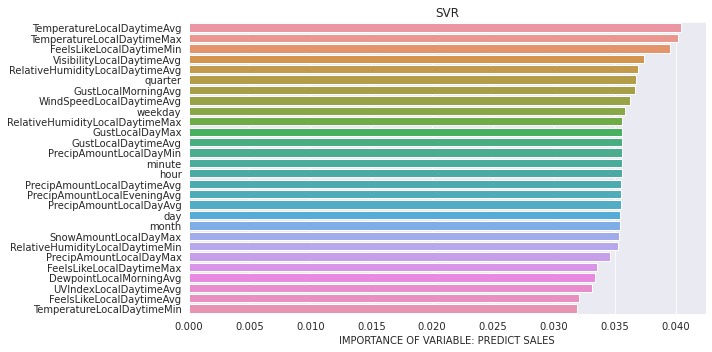

any nan: False ;  all finite: True
any nan: False ;  all finite: True
prediction performance metrics:  {'mae': 2956.0282033036597, 'mape': inf, 'rms': 4622.804766857138, 'mse': 21370323.912477076, 'vs': 0.388286733536119, 'r2': 0.36519739770075976}


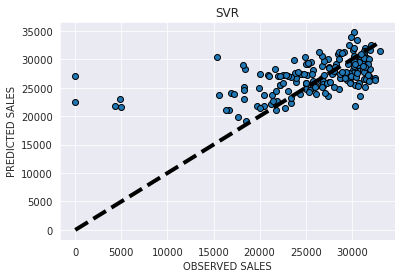

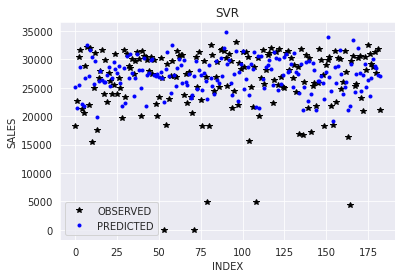

permuted neg_median_absolute_error: -2401.5715684328493 (p = 0.09090909090909091, n = 10)


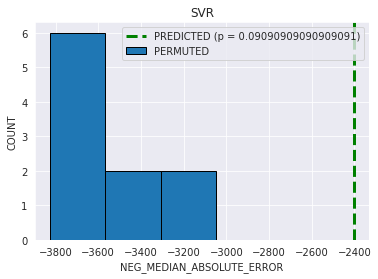

clientname_demo_('078152',) sales RANDOMFOREST 648.6191666666673


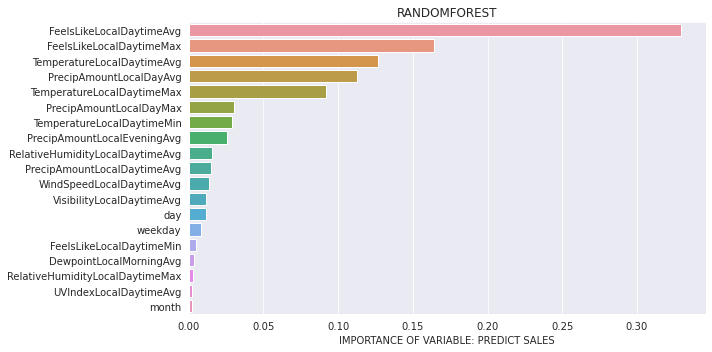

any nan: False ;  all finite: True
any nan: False ;  all finite: True
prediction performance metrics:  {'mae': 980.3351548269583, 'mape': inf, 'rms': 1515.005537985614, 'mse': 2295241.7801270797, 'vs': 0.9323878681121088, 'r2': 0.9318201511171328}


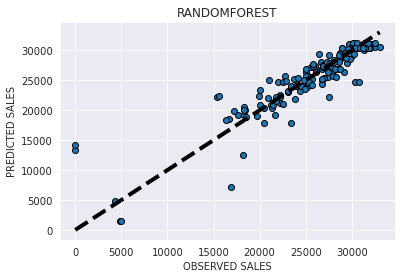

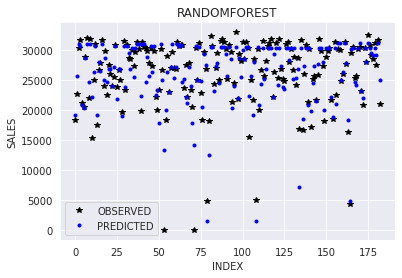

permuted neg_median_absolute_error: -847.9848333333342 (p = 0.09090909090909091, n = 10)


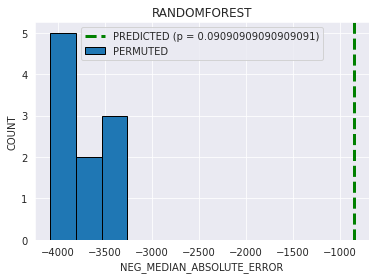

clientname_demo_('094352',) sales SVR 1905.1861643838056


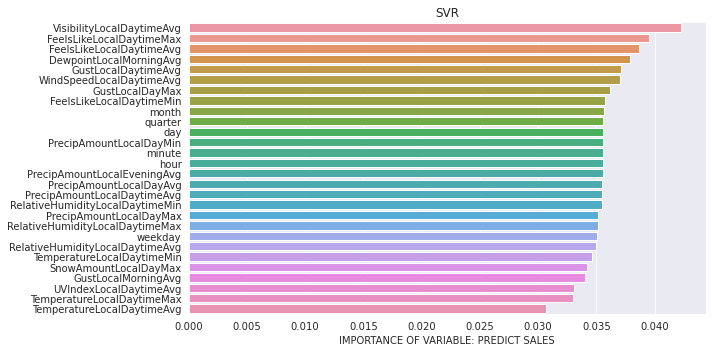

any nan: False ;  all finite: True
any nan: False ;  all finite: True
prediction performance metrics:  {'mae': 3115.9700710779357, 'mape': inf, 'rms': 5225.311612101741, 'mse': 27303881.443565294, 'vs': 0.696281510075524, 'r2': 0.6962070348496732}


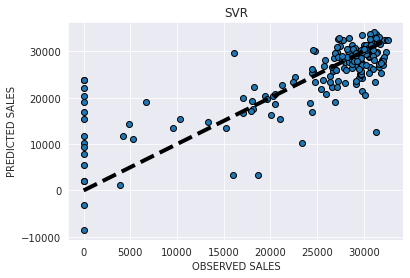

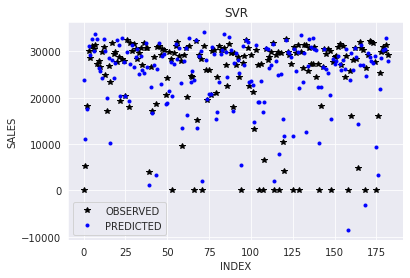

permuted neg_median_absolute_error: -2252.437634078871 (p = 0.09090909090909091, n = 10)


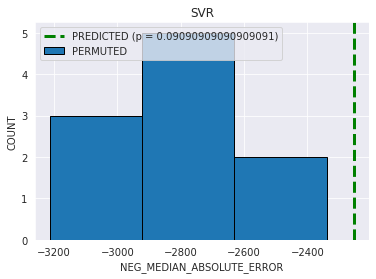

clientname_demo_('094352',) sales RANDOMFOREST 660.4599999999955


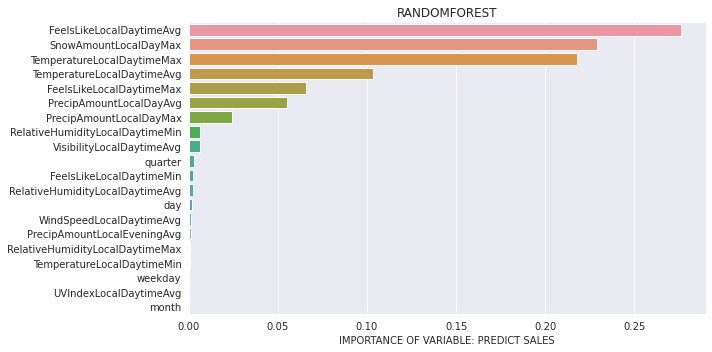

any nan: False ;  all finite: True
any nan: False ;  all finite: True
prediction performance metrics:  {'mae': 1147.0890072859745, 'mape': nan, 'rms': 2451.0384019109865, 'mse': 6007589.247642363, 'vs': 0.933423998293468, 'r2': 0.9331573661159224}


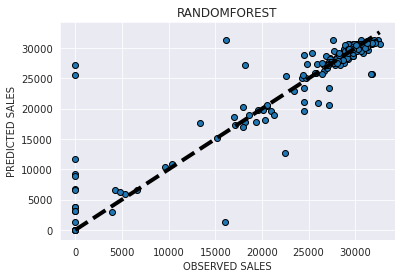

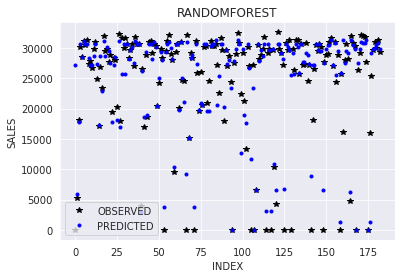

permuted neg_median_absolute_error: -805.360500000001 (p = 0.09090909090909091, n = 10)


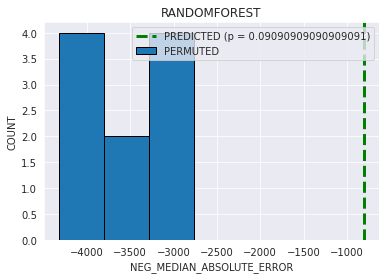

clientname_demo_('096468',) sales SVR 1149.3703258189053


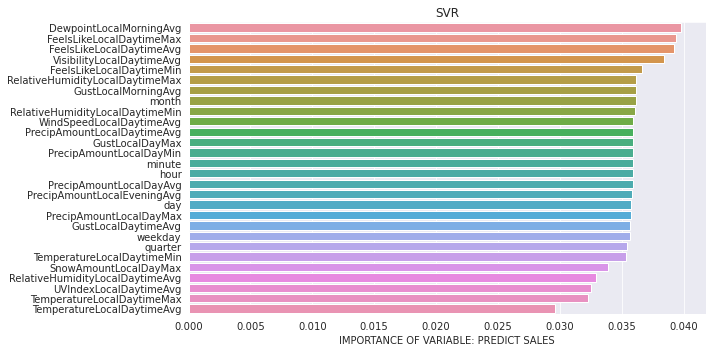

any nan: False ;  all finite: True
any nan: False ;  all finite: True
prediction performance metrics:  {'mae': 3552.092214355076, 'mape': inf, 'rms': 7169.839265331998, 'mse': 51406595.090696484, 'vs': 0.3729479632778916, 'r2': 0.3008556532543696}


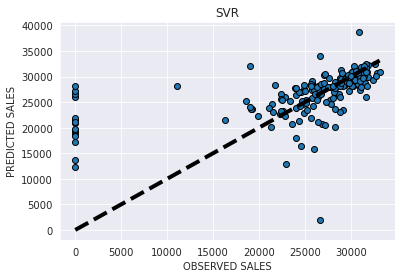

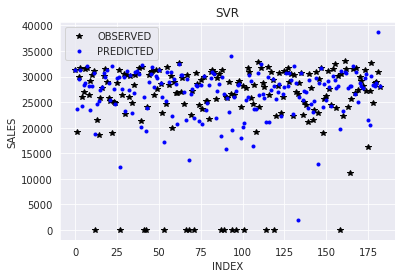

permuted neg_median_absolute_error: -1854.4563003446324 (p = 0.09090909090909091, n = 10)


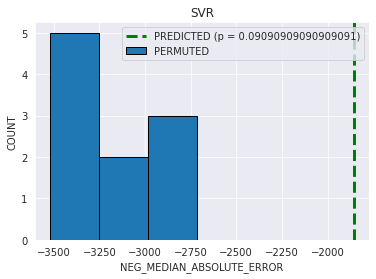

clientname_demo_('096468',) sales RANDOMFOREST 470.0449999999946


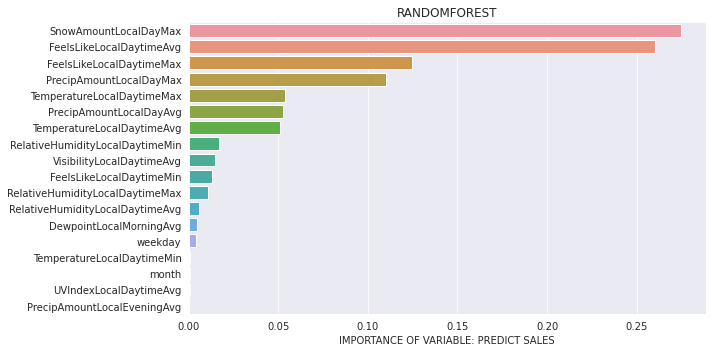

any nan: False ;  all finite: True
any nan: False ;  all finite: True
prediction performance metrics:  {'mae': 941.5529690346089, 'mape': nan, 'rms': 2290.7916717274134, 'mse': 5247726.483255677, 'vs': 0.9286465777900289, 'r2': 0.9286294239569364}


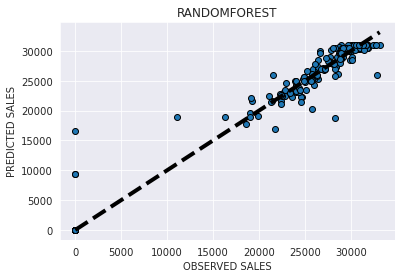

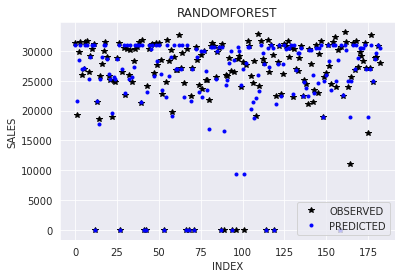

permuted neg_median_absolute_error: -724.5046666666655 (p = 0.09090909090909091, n = 10)


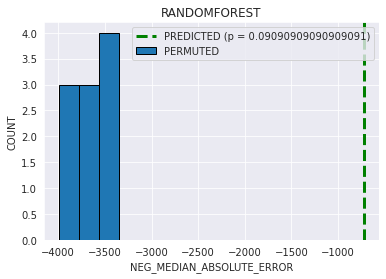

DONE: EVALMODELS_BUILD!
elapsed time of evalmodels_build: 12.902322053909302
DONE: 'STEP 2.1: Build Predictive Models' Work


In [19]:
# ----------------------------------------------------------------------------------------------------------------------
# COMPUTE "MODEL EVALUATION" RESULTS 
# ----------------------------------------------------------------------------------------------------------------------

# compute related plots
print("Feature Importance based on each algorithm technique : ")
ttic = time.time()
results_evaluatebuild = evalmodels_build(datastrata[0:3], results_modelsbuild)
ttoc = time.time()
print("elapsed time of evalmodels_build:", ttoc - ttic)

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 2.1: Build Predictive Models' Work")


In [20]:
# ----------------------------------------------------------------------------------------------------------------------
# DISPLAY "MODEL EVALUATION" RESULTS
# ----------------------------------------------------------------------------------------------------------------------

# #
# savefile = "/project_data/data_asset/buildmodels_performances.csv"

#
list_columnsfirst = ["namedata", "vardependent", "namemla"]

#
dfP = pd.DataFrame({})

for ii in results_modelsbuild:
    dfTemp = pd.DataFrame(ii["cvresults_models"])
    dfTemp["namedata"] = ii["name_data"]
    dfTemp["namemla"] = ii["name_mla"]
    dfTemp["vardependent"] = ii["variable_dependent"]
    dfP = pd.concat([dfP, dfTemp], axis=0)
    
dfP = dfP.loc[:, list_columnsfirst + list(set(dfP.columns) - set(list_columnsfirst))]

# confirm table
mydfdescribe(dfP)
display(dfP)
dfP.shape

# # save table
# dfP.to_csv(savefile, sep=",", header=True, index=False)


dtypes  nunique  count  percent_nan  percent_blank  percent_zero  percent_negative  \
namedata                         object   3.0      30     0.0          0.0            0.0          NaN                 
vardependent                     object   1.0      30     0.0          0.0            0.0          NaN                 
namemla                          object   2.0      30     0.0          0.0            0.0          NaN                 
train_neg_median_absolute_error  float64  30.0     30     0.0          0.0            0.0           1.000000           
train_neg_mean_absolute_error    float64  30.0     30     0.0          0.0            0.0           1.000000           
fit_time                         float64  30.0     30     0.0          0.0            0.0           0.000000           
test_neg_mean_absolute_error     float64  30.0     30     0.0          0.0            0.0           1.000000           
estimator                        object   30.0     30     0.0          0.0            0.0          NaN                 
test_explained_variance          float64  30.0     30     0.0          0.0            0.0           0.033333           
score_time                       float64  30.0     30     0.0          0.0            0.0           0.000000           
train_explained_variance         float64  30.0     30     0.0          0.0            0.0           0.000000           
test_neg_median_absolute_error   float64  30.0     30     0.0          0.0            0.0           1.000000           
test_r2                          float64  30.0     30     0.0          0.0            0.0           0.033333           
variables_importances            object  NaN       30     0.0          0.0            0.0          NaN                 
train_r2                         float64  30.0     30     0.0          0.0            0.0           0.000000           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            min  \
namedata                         clientname_demo_('078152',)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

namedata vardependent       namemla  train_neg_median_absolute_error  train_neg_mean_absolute_error  fit_time  test_neg_mean_absolute_error                                                                                                                                                                                                                                                                                                                                                           estimator  test_explained_variance  score_time  train_explained_variance  test_neg_median_absolute_error   test_r2  \
0  clientname_demo_('078152',)  sales        SVR          -2138.992426                     -3007.893390                    0.017671 -2702.262834                   SVR(C=100, gamma='auto', kernel='linear')                                                                                                                                                                                                                                                                                                                           0.294333                 0.001465    0.407117                 -2114.174843                     0.284359   
1  clientname_demo_('078152',)  sales        SVR          -1859.867331                     -2664.280849                    0.029022 -3947.768664                   SVR(C=100, gamma='auto', kernel='linear')                                                                                                                                                                                                                                                                                                                           0.159542                 0.001391    0.454085                 -2654.526804                     0.104012   
2  clientname_demo_('078152',)  sales        SVR          -1761.823609                     -2750.595456                    0.017256 -3916.916587                   SVR(C=100, gamma='auto', kernel='linear')                                                                                                                                                                                                                                                                                                                           0.355371                 0.001196    0.336276                 -2858.362141                     0.308570   
3  clientname_demo_('078152',)  sales        SVR          -2111.812142                     -3074.262259                    0.014172 -2473.239142                   SVR(C=100, gamma='auto', kernel='linear')                                                                                                                                                                                                                                                                                                                           0.476823                 0.001573    0.376942                 -1750.941089                     0.467802   
4  clientname_demo_('078152',)  sales        SVR          -2135.923215                     -2927.222314                    0.036204 -3306.898406                   SVR(C=100, gamma='auto', kernel='linear')                                                                                                                                                                                                                                                                                                                           0.381369                 0.001293    0.368444                 -2629.852965                     0.379371   
0  clientname_demo_('078152',)  sales        RANDOMFOREST -575.849167                      -753.328904                     0.010880 -1341.288063                   (DecisionTreeRegressor(criterion='mae', max_depth=5, max_features=20,\n                      random_sta

(30, 15)

array([<AxesSubplot:title={'center':'test_neg_mean_absolute_error'}, xlabel='namemla'>,
       <AxesSubplot:title={'center':'train_neg_mean_absolute_error'}, xlabel='namemla'>],
      dtype=object)

DONE: 'STEP 2.1: Build Predictive Models then Examine Predictive Build Model Performance' Work


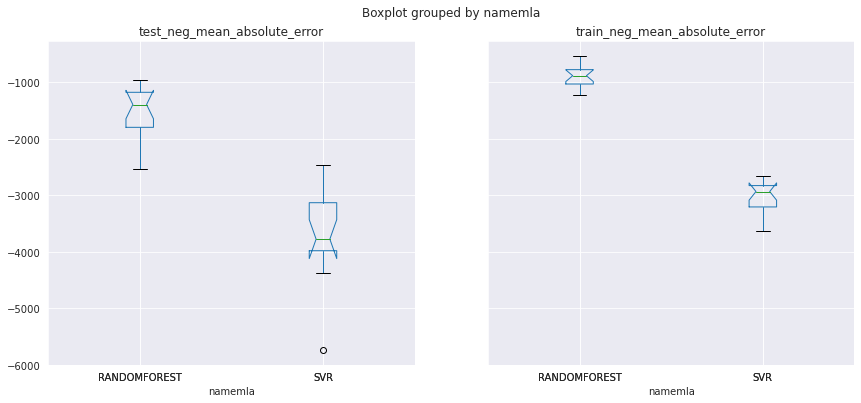

In [21]:
# ----------------------------------------------------------------------------------------------------------------------
# Comparison of Mean absolute error between Random Forest and SVM
# ----------------------------------------------------------------------------------------------------------------------

list_plotmetrics = ["test_neg_mean_absolute_error", "train_neg_mean_absolute_error"]

dfP.boxplot(column=list_plotmetrics, by="namemla", notch=True, figsize=(14,6))

# notify scientist: completed analyses
print("DONE: 'STEP 2.1: Build Predictive Models then Examine Predictive Build Model Performance' Work")


### Step 2.2: Save Predictive Models

This step saves the best predictive models to the CP4D (IBM Cloud Pak for Data) platform for both archived results and prospective deployed operationalization. The completion of this step entails the creation of a deployment workspace (space). The deployment space allows you to save, configure, and deploy computed predictive models. Additionally, the workspace allows for saving code assets, data assets, and models. The following bullets and corresponding cells involve saving and then deploying models by leveraging the *ibm_watson_machine_learning* package to complete this STEP 2.2 process.

 1. Use the predefined workspace-related configuration file values to create the deployment space.
 2. Create the deployment space.
 3. Store the models and their details in the space.
 4. Deploy the models for future operationalized use (e.g., see the *applypredictivemodelsScikitlearn* notebook) in the space.
 5. Store the "model data scaler" info from the earlier "build models" process as a *data_asset* file.


### Store the Models and then Deploy the Models

Store the models in the deployment space repository, specifying a name per model via its model storage metadata.
Software specification for the model is specified in the model metadata. <br>
The Software Specification refers to the runtime used in the Notebook, WML training and WML deployment. We use the `default_py3.8` software specification to store the models. We get the ID of the software specification and include it in the metadata when storing the model. Available software specifications can be retrieved using `client.software_specifications.list()`. 

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------
# STORE MODELS THEN DEPLOY MODELS
# ----------------------------------------------------------------------------------------------------------------------

#
results_modelsbuild_onemla = [ii for ii in results_modelsbuild if (ii["name_mla"].lower() == "randomforest")]

#
dict_modeldatascaler = {}

sw_spec_uid = client.software_specifications.get_uid_by_name("default_py3.8")

#
for results_modelnow in results_modelsbuild_onemla:
        
    # make model nameid
    model_nameid = "{}_{}".format(results_modelnow["name_data"], results_modelnow["name_mla"])
    
    # make model nameidtag
    model_nameidtag = model_nameid.replace("_store", "").replace("_deploy", "").replace("(", "").replace(")", "").replace(",", "-").replace("'", "")
    
    # get model
    model = results_modelnow["cvresults_modelbest"]["estimator"]
    
    # get model data scaler
    modeldatascaler = results_modelnow["datascaler"]
    dict_modeldatascaler[model_nameid] = modeldatascaler

    # get independent variables list
    list_variablesindependent = results_modelnow["variables_independent"]
    
    # ----------------------------------------------------------------------------------------------------------------------
    # STORE MODELS
    # ----------------------------------------------------------------------------------------------------------------------

    #
    print("Storing Model {}: name as {}; nametag as {}".format(model_nameid, model_nameid, model_nameidtag + "_store"))

    # make store model metadata
   
    

    metadata_modelstore = {
        client.repository.ModelMetaNames.NAME: model_nameid,
        client.repository.ModelMetaNames.TYPE: "scikit-learn_0.23",
        client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sw_spec_uid 
    }
    
    # store the model
    modelstored = client.repository.store_model(model=model, meta_props=metadata_modelstore, 
                                                training_data=None, training_target=None, feature_names=list_variablesindependent, 
                                                                           pipeline=modeldatascaler)
    
    # ----------------------------------------------------------------------------------------------------------------------
    # DEPLOY MODELS
    # ----------------------------------------------------------------------------------------------------------------------

    #
    print("Deploying Model {}: name as {}; nametag as {}".format(model_nameid, model_nameidtag, model_nameidtag + "_deploy"))
    
    # make deploy model metadata
    metadata_modeldeploy = {
       
        client.deployments.ConfigurationMetaNames.NAME: model_nameidtag,
        client.deployments.ConfigurationMetaNames.SERVING_NAME: model_nameidtag.replace('-','').lower().replace('_','')[:30]+''.join(random.choice(string.ascii_lowercase + string.digits) for _ in range(6))}
    
     
       
    # deploy the model
    client.deployments.create(artifact_uid=modelstored["metadata"]["id"], meta_props=metadata_modeldeploy)


# ----------------------------------------------------------------------------------------------------------------------
# STORE MODEL DATA SCALER INFO
# ----------------------------------------------------------------------------------------------------------------------

# save model data scalers as a file
# note: mimetype is guessed when promoting the asset into the deployment space; 
#     : thus save the object as a file type recognised by the mimetype library;
#     : this hack does not impact the object type currenlty fortunately
# joblib.dump(dict_modeldatascaler, "/project_data/data_asset/dict_modeldatascaler.json")
with open("dict_modeldatascaler.json", "w") as f:
    json.dump(dict_modeldatascaler, f)



Type Markdown and LaTeX:  𝛼2

<hr>

Sample Materials, provided under <a href="https://github.com/IBM/Industry-Accelerators/blob/master/CPD%20SaaS/LICENSE" target="_blank" rel="noopener noreferrer">license</a>. <br>
Licensed Materials - Property of IBM. <br>
© Copyright IBM Corp. 2020, 2021. All Rights Reserved. <br>
US Government Users Restricted Rights - Use, duplication or disclosure restricted by GSA ADP Schedule Contract with IBM Corp. <br>